**SINGULAR VALUE DECOMPOSITION CODE**

In [ ]:
# SINGULAR VALUE DECOMPOSITION CODE
from numpy import array                                                         # Importing Libraries
from scipy.linalg import svd                                                    # Importing Libraries
import numpy as np                                                              # Assigning NumPy the alias of np
Rows = int(input("Enter the number of rows:"))                                  # Getting input of row for dimesnion on given matrix
Col = int(input("Enter the number of columns:"))                                # Getting input of column for dimesnion on given matrix
print("Enter the entries in a single line (separated by space): ")
entries = list(map(int, input().split()))                                       # Command to split the entries and filling the rows first of each column
matrix = np.array(entries).reshape(Rows, Col)                                   # Reshaping and printing matrix for user friendly output
print("Input Matrix:")
print(matrix)
U, E, Vt = svd(matrix)                                                          # Using inbuild funtion (svd) to solve the matrix
Diag_E=np.diag(E)
print("Left Orthogonal Matrix(U):")
print(U)                                                                        # Output screen with results
print("Diagonal Matrix(E):")
print(Diag_E)
print("Right Orthogonal Matrix(Vt):")
print(Vt)

Enter the number of rows:3
Enter the number of columns:3
Enter the entries in a single line (separated by space): 
1 2 3 4 5 6 7 8 9
Input Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Left Orthogonal Matrix(U):
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Diagonal Matrix(E):
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.41842475e-16]]
Right Orthogonal Matrix(Vt):
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


**DYNAMIC MODE DECOMPOSITION CODE**

In [ ]:
# DYNAMIC MODE DECOMPOSITION CODE
from numpy import array        # Importing Libraries
from scipy.linalg import svd   # libraries and functions importing
import numpy as np             #
import time
import math as mt                #
#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2
def DMDsolver_n(X_given,r,no_predictions,dt):
  X1 = X_given[:, : -1] #splitting our given matrix into two matrices X1 and X2
  X2 = X_given[:, 1 :]
  R, C = X.shape #R,C rows and columns no , shape function performs the task of finding no of rows and columns
  U, E, Vt = np.linalg.svd(X1, full_matrices = False) #Applying SVD on X1 as a first step of DMD algorithm
  """In the next step we obtain the matrix A_bar which is an second and important step in DMD algo, this matrix is obtained by multiplication
  of the truncated  matrices"""
  A_bar = np.matmul((np.matmul(np.matmul(U[:, : r].conj().T,X2),Vt[: r, :].conj().T)),np.diag(np.reciprocal(E[: r])))
  '''In the following step we obtain the eigen decomposition of the matrix A_bar into two matrices Phi and Q representing eigen values
  and eigen vectors matrices respectively'''
  Phi, Q = np.linalg.eig(A_bar)
  '''The following step we find Psi matrix in order to find A matrix '''
  Psi=np.matmul(np.matmul(np.matmul(X2,Vt[: r, :].conj().T),np.diag(np.reciprocal(E[: r]))),Q) #dmd mode
  #Here we go to the final step of finding our matrix A which is the root of DMD prediction
  A=np.matmul(np.matmul(Psi,np.diag(Phi)),np.linalg.pinv(Psi)) #not needed from this line for finite differences
  '''In the following steps we will start constructing our predictions matrix C which contains the prediction columns and the number of that
  columns will be equal to the number of predictions we want as given in argument "no_predictions" '''
  lamda = np.diag(Phi)
  logterm =lamda[0,0]
  logterm_1 = (mt.log(logterm))
  omega = logterm_1/dt

  C = np.zeros((R, no_predictions)) #This step represents the construction of zero matrix R x no_predictions
  x2 = X2[:,-1]
  #print(Psi)
  b = (np.matmul(np.linalg.pinv(Psi),x2))
  #print(np.matmul(Q,b))
  #print(b[0])
  #print((np.matmul(U,Q)).real)
  d=1 #iteration counter
  lamdamatrix = np.matmul(np.matmul(np.linalg.pinv(np.diag((b.real))),np.linalg.pinv(Psi.real)),X1)
  #print(lamdamatrix.real)
  '''while (d<=no_predictions): #Loop for editing the columns of zero matrix C into the prediction columns
    C[:,d-1]=((np.linalg.matrix_power(A, d)) @ X2)[:,-1]
    d=d+1'''
  BN=((((lamdamatrix[0,-1]))*(np.matmul(Psi,b))).transpose()).real
  BN2= ((b[0].real)*(Psi[:,0])).real
  return BN2 #returning predicted values matrix
X = np.zeros((5, 5))
X[0,:] = np.arange(1,6) #np.arrange (start,stop,step) this is important when your require patterns in input
X[1,:] = np.arange(10,15) #input in the format of nested array
X[2,:] = np.arange(5,10)
X[3,:] = np.arange(4,9)
X[4,:] = np.arange(16,21)
#start = time.time()
s= DMDsolver_n(X,5,1,0.1)
print(s)
#end = time.time()
'''#print(X)
print(s)
v=%timeit DMDsolver(X,5,6)
print(f"Runtime of the program is {end - start}")
print(v)'''

[6.62482488 6.62482488 6.62482488 6.62482488 6.62482488]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


'#print(X)\nprint(s)\nv=%timeit DMDsolver(X,5,6)\nprint(f"Runtime of the program is {end - start}")\nprint(v)'

In [ ]:
from numpy import array        # Importing Libraries
from scipy.linalg import svd   #libraries and functions importing
import numpy as np
import time
#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2
def DMDsolver(X_given,no_predictions): #Function
  X1 = X_given[:, : -1] #splitting our given matrix into two matrices X1 and X2
  X2 = X_given[:, 1 :] #X1 and X2 are the two important matrices in the dynamic mode decomposition code
  R, C = X.shape #R,C rows and columns no , shape function performs the task of finding no of rows and columns
  q, r = np.linalg.qr(X1)
  a = np.matmul(np.matmul(np.linalg.pinv(r),q.transpose()),X2[:,-1])
  #S=np.matmul(np.linalg.pinv(X1),X2)
  #C = np.zeros((R, no_predictions)) #This step represents the construction of zero matrix R x no_predictions
  #d=1 #iteration counter
 # while (d<=no_predictions): #Loop for editing the columns of zero matrix C into the prediction columns
    #C[:,d-1]=((np.linalg.matrix_power(A, d)) @ X2)[:,-1]
    #d=d+1
  return (a[0]*X1[:,0]).transpose() #returning predicted values matrix
X = np.zeros((5, 200))
X[0,:] = np.arange(1,201) #np.arange (start,stop,step) this is important when your require patterns in input
X[1,:] = np.arange(2,202) #input in the format of list
X[2,:] = np.arange(3,203)
X[3,:] = np.arange(4,204)
X[4,:] = np.arange(5,205)
start = time.time() #we mark the start time of the program
s=DMDsolver(X,6)
end = time.time() #End time of the program is noted so that the final time can be printed down
print(s)
v=%timeit DMDsolver(X,6) #here we have the function that displays the time required for the program to run
print(f"Runtime of the program is {end - start}")

[-0.01005025 -0.0201005  -0.03015075 -0.04020101 -0.05025126]
206 µs ± 7.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Runtime of the program is 0.017945528030395508


**PROPER ORTHOGONAL DECOMPOSITION CODE**

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

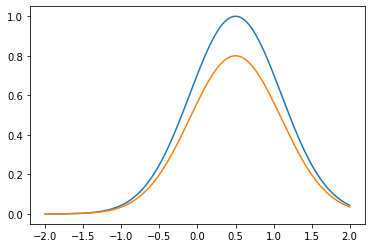

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interactive

x = np.linspace(-2,2,401) #linspace function generates the array of numbers which are equispatially lying in between the the two specified points in the first two arguments of the linspace functions
nrow = np.size(x)
x = list(x)
amp1 = 1.2 #we give input values to the signal
x01 = 0.5
sigma_y1 = 0.6

amp2 = 1.5
x02 = -0.5
sigma_y2 = 0.6

dt = 0.01
t_end = 10
ncol= (t_end/dt)+1
ncol= int(ncol)
ts = np.linspace(0,t_end,ncol)

omega_1 = 1.3
omega_2 = 5.2

Y = np.zeros((nrow, ncol),dtype='d')
ts  = list(ts)
#y1 = amp1*np.exp(-((xx-x01)**2)/(2*sigma_y1**2))
#y2 = amp2*np.exp(-((xx-x02)**2)/(2*sigma_y2**2))
P = list([])
Q = list([])

for xx in x:
  for tt in ts:
    Q.append((amp1*np.exp(-((xx-x01)**2)/(2*sigma_y1**2))*np.sin(2*np.pi*omega_1*tt))+(amp2*np.exp(-((xx-x02)**2)/(2*sigma_y2**2))*np.sin(2*np.pi*omega_2*tt)))
  P.append(Q)
  Q = list([])

#print(P)
#print(len(P[0]))
P = np.array(P)
shape=(nrow,ncol)
Y = P.reshape(shape)
#print(Y)
x = np.array(x)
y_1 = list([])
y_2 = list([])

for xx in x:
  y1 = amp1*np.exp(-((xx-x01)**2)/(2*sigma_y1**2))
  y2 = amp2*np.exp(-((xx-x02)**2)/(2*sigma_y2**2))
  y_1.append(y1)
  y_2.append(y2)
y_1=np.array(y_1)
y_2=np.array(y_2)
y_3=y_1/amp1
y_4=y_1/amp2
plt.plot(x,y_3)
plt.plot(x,y_4)
#plt.plot(x,y_1) #using plot funtion to plot our x and y_1 and y_2 values
#plt.plot(x,y_2)
#print(P.shape)
#print(Y)
#print(len(list_1))
U, E, Vt = np.linalg.svd(Y, full_matrices = False)
#plt.semilogy(E,'-o')
#print(E)
#print(U.shape)
x = np.linspace(-2,2,401)
ts = np.linspace(0,t_end,ncol)
f = lambda x,ts:  (amp1*(np.exp(-((x-x01)**2)/(2*sigma_y1**2)))*np.sin(2*np.pi*omega_1*ts))+(amp2*(np.exp(-((x-x02)**2)/(2*sigma_y2**2)))*np.sin(2*np.pi*omega_2*ts))
X , T = np.meshgrid(x,ts)
F = f(X,T)

def plotter (E,A):
  fig = plt.figure(figsize=[12,8])
  ax = fig.gca(projection='3d')
  ax.plot_surface(X,T,F,cmap=cm.coolwarm)
  ax.view_init(elev=E,azim=A)
  plt.show()

iplot = interactive(plotter,E=(-90,90,5),A=(-90,90,5))
iplot

**FINITE DIFFERENCES METHOD CODE**

EXPLICIT METHOD HEAT CONDUCTION

Enter number of nodes: 6
[[100, 0, 0, 0, 0, 50], [100, 2.5, 0.0, 0.0, 1.25, 50], [100, 4.875, 0.0625, 0.03125, 2.4375, 50], [100, 7.1328125, 0.18203125, 0.0921875, 3.56640625, 50], [100, 9.28072265625, 0.3535546875, 0.18128906250000001, 4.640390625, 50], [100, 11.325525390625, 0.5724272460937501, 0.29707324218750003, 5.6629033203125, 50], [100, 13.273559802246094, 0.8343708496093751, 0.4381028442382813, 6.6371849853515625, 50], [100, 15.130741083374025, 1.1354438732910157, 0.6029865979003907, 7.5662783071899415, 50], [100, 16.902590126037598, 1.4720148716583252, 0.7903803225173951, 8.453039056777953, 50], [100, 18.594260991527175, 1.840738389289284, 0.9989876546024323, 9.30014661200199, 50], [100, 20.21056640168305, 2.23853268597806, 1.2275603969045925, 10.110113972766952, 50], [100, 21.75600139874835, 2.662559221643848, 1.4748985435279882, 10.88529728405122, 50], [100, 23.234765309352028, 3.1102037591185643, 1.7398500289939656, 11.627904883436859, 50], [100, 24.65078213786239, 3.57905

Text(0, 0.5, 'Temprature')

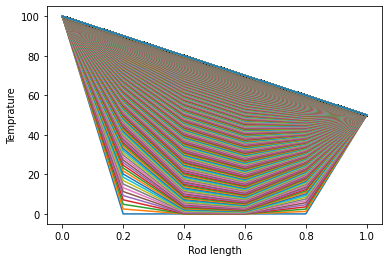

In [ ]:
#EXPLICIT METHOD
from numpy import array        # Importing Libraries
import numpy as np             #libraries and functions importing
import time
import matplotlib.pyplot as plt
import matplotlib.animation as ani
inp = int(input("Enter number of nodes: "))
T = [100]
i=1
while (i<=inp-2):
  T.append(0)
  i=i+1
T.append(50)
x=np.linspace(0,1,inp)
i=1
t_end=200
t=0.1
lam =  0.025
alpha=0.01
dx = x[1]-x[0]
dt = (lam*((dx)**2))/alpha
#print(dt)
arr= np.linspace(1,len(T)-2,len(T)-2)
arr = [int(arr) for arr in arr]
list_1=[T]
while (t<=t_end):
  list_2=[100]
  for i in arr:
    list_2.append(T[i] + lam*(T[i+1] -2*T[i]+T[i-1]))
  list_2.append(50)
  list_1.append(list_2)
  T=list_2
  t=t+dt
print(list_1)
arr_1= np.array(list_1)
i=0
print(len(arr_1))
while (i<=len(arr_1)-1):
  plt.plot(x,arr_1[i])
  i=i+1
plt.xlabel("Rod length")
plt.ylabel("Temprature")

EXPLICIT METHOD HEAT CONDUCTION

Enter number of nodes: 64
0.0006298815822625346
[100, 99.2063491934463, 98.41269838692473, 97.61904758046721, 96.82539677410577, 96.03174596787194, 95.23809516179698, 94.44444435591176, 93.65079355024679, 92.85714274483179, 92.06349193969612, 91.26984113486819, 90.47619033037586, 89.68253952624607, 88.88888872250484, 88.09523791917726, 87.30158711628746, 86.50793631385834, 85.71428551191173, 84.92063471046825, 84.12698390954726, 83.33333310916689, 82.53968230934379, 81.74603151009333, 80.95238071142944, 80.15872991336461, 79.3650791159098, 78.57142831907443, 77.77777752286643, 76.98412672729218, 76.19047593235645, 75.39682513806245, 74.60317434441174, 73.80952355140431, 73.0158727590386, 72.22222196731143, 71.42857117621801, 70.63492038575195, 69.84126959590536, 69.04761880666878, 68.25396801803124, 67.46031722998029, 66.66666644250198, 65.87301565558094, 65.07936486920055, 64.28571408334263, 63.49206329798786, 62.69841251311557, 61.904761728703946, 61.11111094473002, 60.31746016116972

Text(0, 0.5, 'log(norm)')

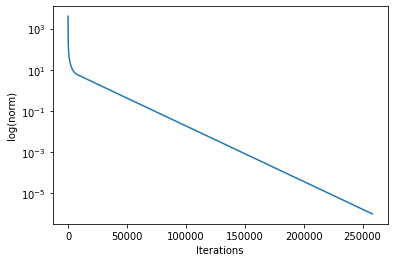

In [ ]:
#EXPLICIT METHOD APPLICATION
from numpy import array        # Importing Libraries
import numpy as np             #libraries and functions importing
import time
import math as mt
import matplotlib.pyplot as plt
import matplotlib.animation as ani
inp = int(input("Enter number of nodes: "))

T = [100]
i=1
while (i<=inp-2):
  T.append(0)
  i=i+1
T.append(50)
i=1

t_end=200
t=0.1
x=np.linspace(0,1,inp)
#print(len(x))
alpha = 0.01
lam= 0.025
dx = x[1]-x[0]
dt = (lam*((dx)**2))/alpha

print(dt)
arr= np.linspace(1,len(T)-2,len(T)-2)
arr = [int(arr) for arr in arr]
#print(arr)
list_1=[T]
#print(list_1)

while (t<=t_end):
  list_2=[100]
  for i in arr:
    list_2.append(T[i] + lam*(T[i+1] -2*T[i]+T[i-1]))
  list_2.append(50)
  list_1.append(list_2)
  T=list_2
  t=t+dt
print(list_1[-1])
#print(len(arr_1))
norm_collect_d = []
norm=1
sub_list = list([])
u=[]
i=0
ep=10**-6
while (norm>ep):
  sub_list = list([])
  for i1,i2 in zip(list_1[i+1],list_1[i]):
    sub_list.append(i1-i2)
  norm = max(sub_list)/dt
  u.append(i)
  i=i+1
  norm_collect_d.append(norm)

#print(r)
u=np.array(u)
print(len(u))

norm_collect_d=np.array(norm_collect_d)

#print(r)
print(norm_collect_d)
#print(i)
plt.yscale("log")
plt.plot(u,norm_collect_d)
plt.xlabel("Iterations")
plt.ylabel("log(norm)")

DYNAMIC MODE DECOMPOSITION (RELEVANT)

In [ ]:
# DYNAMIC MODE DECOMPOSITION CODE
from numpy import array        # Importing Libraries
from scipy.linalg import svd   # libraries and functions importing
import numpy as np             #
import time                    #
#Now we will define a function named DMDsolver which will split up our given matrix X into two matrices X1 and X2
def DMDsolver_r(X_given,r):
  X1 = X_given[:, : -1] #splitting our given matrix into two matrices X1 and X2
  X2 = X_given[:, 1 :] #X1 and X2 are the two important matrices in the dynamic mode decomposition code
  R, C = X_given.shape #R,C rows and columns no , shape function performs the task of finding no of rows and columns
  '''q, r = np.linalg.qr(X1).real
  a = np.array(np.matmul(np.matmul(np.linalg.pinv(r),q.transpose()),X2[:,-1])).real'''
  U, E, Vt = np.linalg.svd(X1, full_matrices = False) #Applying SVD on X1 as a first step of DMD algorithm
  """In the next step we obtain the matrix A_bar which is an second and important step in DMD algo, this matrix is obtained by multiplication
  of the truncated  matrices"""
  A_bar = np.matmul((np.matmul(np.matmul(U[:, : r].conj().T,X2),Vt[: r, :].conj().T)),np.diag(np.reciprocal(E[: r])))
  '''In the following step we obtain the eigen decomposition of the matrix A_bar into two matrices Phi and Q representing eigen values
  and eigen vectors matrices respectively'''
  Phi, Q = np.linalg.eig(A_bar)
  Psi=np.matmul(np.matmul(np.matmul(X2,Vt[: r, :].conj().T),np.diag(np.reciprocal(E[: r]))),Q) #dmd mode
  #S=np.matmul(np.linalg.pinv(X1),X2)
  #C = np.zeros((R, no_predictions)) #This step represents the construction of zero matrix R x no_predictions
  #d=1 #iteration counter
 # while (d<=no_predictions): #Loop for editing the columns of zero matrix C into the prediction columns
    #C[:,d-1]=((np.linalg.matrix_power(A, d)) @ X2)[:,-1]
    #d=d+1
  #return ((a[0]*X1[:,0]).transpose())  #returning predicted values matrix)
  #print(U)
  #print(((Q[:,0])).real)
  Mode = np.matmul(U,(Q[:,0]))
  Mode_1 = Psi[:,0]
  #print (np.shape(((Phi[0]).real)*sMode))
  return ((((Phi[0]).real)**2)*((Mode_1).real)).transpose()
  #return ((A_bar[0][-1])*(X1[:,0]))
  #print(A_bar)
#D=np.array([[1,2,3],[3,4,5],[5,6,7]])
#DMDsolver_r(D,5)


EXPLICIT METHOD APPLICATION with f(x)

Enter number of nodes: 8
3225
[4.86917701e+01 4.62475672e+01 4.39563803e+01 ... 1.00610570e-06
 1.00112387e-06 9.96166818e-07]


Text(0, 0.5, 'norm')

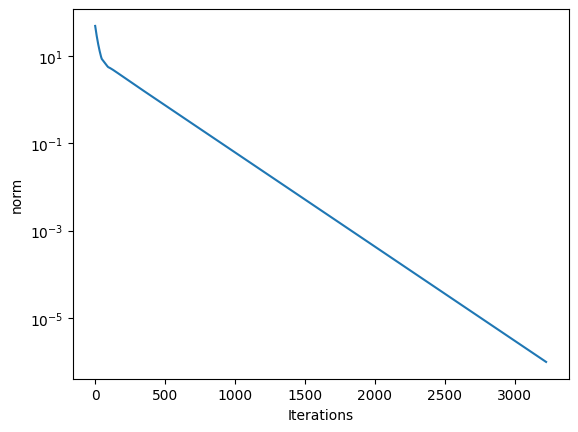

In [2]:
#EXPLICIT METHOD APPLICATION
from numpy import array        # Importing Libraries
import numpy as np             #libraries and functions importing
import time
import math as mt
import matplotlib.pyplot as plt
import matplotlib.animation as ani
inp = int(input("Enter number of nodes: "))

T = [100]
i=1
while (i<=inp-2):
  T.append(0)
  i=i+1
T.append(50)
i=1

t_end=200
t=0.1
x=np.linspace(0,1,inp)
#print(len(x))
alpha = 0.01
lam= 0.025
dx = x[1]-x[0]
dt = (lam*((dx)**2))/alpha
arr= np.linspace(1,len(T)-2,len(T)-2)
arr = [int(arr) for arr in arr]
#print(arr)
list_1=[T]
#print(list_1)
f = lambda x: -(4*3.14*3.14*alpha*mt.sin(2*3.14*x))
while (t<=t_end):
  list_2=[100]
  for i in arr:
    list_2.append(T[i] + lam*(T[i+1] -2*T[i]+T[i-1])+(f(x[i])*dt))
  list_2.append(50)
  list_1.append(list_2)
  T=list_2
  t=t+dt
#print(list_1[len(list_1)-1])
#print(len(arr_1))
norm_collect_d = []
norm=1
sub_list = list([])
u=[]
i=0
ep=10**-6
while (norm>ep):
  sub_list = list([])
  for i1,i2 in zip(list_1[i+1],list_1[i]):
    sub_list.append(i1-i2)
  norm = max(sub_list)/dt
  u.append(i)
  i=i+1
  norm_collect_d.append(norm)

#print(r)
u=np.array(u)
print(len(u))

norm_collect_d=np.array(norm_collect_d)

#print(r)
print(norm_collect_d)
#print(i)
plt.yscale("log")
plt.plot(u,norm_collect_d)
plt.xlabel("Iterations")
plt.ylabel("norm")


DYNAMIC MODE DECOMPOSITION + EXPLICIT METHOD APPLICATION


In [3]:
#EXPLICIT METHOD APPLICATION WITH DMD
from numpy import array        # Importing Libraries
import numpy as np             #libraries and functions importing
import time
import math as mt
import matplotlib.pyplot as plt
import matplotlib.animation as ani
inp = int(input("Enter number of nodes: "))

T = [100]
i=1
while (i<=inp-2):
  T.append(0)
  i=i+1
T.append(50)
i=1

t_end=300
t=0.1
x=np.linspace(0,1,inp)
#print(len(x))
alpha = 0.01
lam= 0.025
dx = x[1]-x[0]
dt = (lam*((dx)**2))/alpha

#print(lam)
arr= np.linspace(1,len(T)-2,len(T)-2)
arr = [int(arr) for arr in arr]
#print(arr)
list_1=[T]
#print(list_1)
norm_collect_d = []
norm=1
sub_list = list([])
u=[]
i=0
Y=list([])
l =1
while (t<=t_end):

  if (norm>0.1):
    list_2=[100]
    for y in arr:
      list_2.append(T[y] + lam*(T[y+1] -2*T[y]+T[y-1]))
    list_2.append(50)
    list_1.append(list_2)
    sub_list = list([])
    for i1,i2 in zip(list_1[i+1],list_1[i]):
      sub_list.append(i1-i2)
    norm = max(sub_list)/dt
    u.append(i)
    i=i+1
    norm_collect_d.append(norm)
    T=list_2
    t=t+dt
    n=i
  else:
    if (norm<=10**-6):
      break
    if (i==n) and (l<=20):
      Y.append(list_1[i])
      n=n+20
      if (l==20):
        print(i)
        Y = np.array(Y)
        Y = Y.transpose()
        list_1[i] =DMDsolver_n(Y,5,1,dt).tolist()
        T = DMDsolver_n(Y,5,1,dt).tolist()

      l=l+1
    list_2=[100]
    for o in arr:
      list_2.append(T[o] + lam*(T[o+1] -2*T[o]+T[o-1]))
    list_2.append(50)
    list_1.append(list_2)
    T=list_2
    sub_list = list([])
    for i1,i2 in zip(list_1[i+1],list_1[i]):
      sub_list.append(i1-i2)
    norm = max(sub_list)/dt
    norm_collect_d.append(norm)
    u.append(i)

    i=i+1

    t=t+dt

print(list_1[-1])
u = np.array(u)
#print(r)
#print(norm_collect_d)
print(i)
plt.yscale("log")
plt.plot(u,norm_collect_d)
plt.xlabel("Iterations")
plt.ylabel("norm")


Enter number of nodes: 8
1285


NameError: ignored

PLOT OF CONVERGENCE ACCELARATION (EXPLICIT METHOD)

NameError: ignored

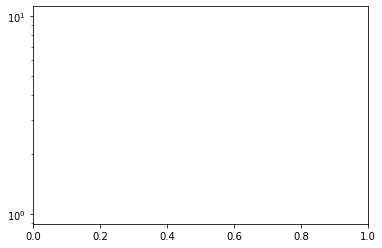

In [ ]:
plt.yscale("log")
plt.plot(r,norm_collect)
plt.plot(u,norm_collect_d)

IMPLICIT METHOD

[[1.00000000e+02 2.00465303e+00 4.05888074e-02 2.08985938e-02
  1.00233862e+00 5.00000000e+01]
 [1.00000000e+02 3.93053648e+00 1.18962699e-01 6.18268666e-02
  1.96532686e+00 5.00000000e+01]
 [1.00000000e+02 5.78151161e+00 2.32490709e-01 1.21937311e-01
  2.89092614e+00 5.00000000e+01]
 ...
 [1.00000000e+02 9.00000000e+01 8.00000000e+01 7.00000000e+01
  6.00000000e+01 5.00000000e+01]
 [1.00000000e+02 9.00000000e+01 8.00000000e+01 7.00000000e+01
  6.00000000e+01 5.00000000e+01]
 [1.00000000e+02 9.00000000e+01 8.00000000e+01 7.00000000e+01
  6.00000000e+01 5.00000000e+01]]


Text(0, 0.5, 'Temprature')

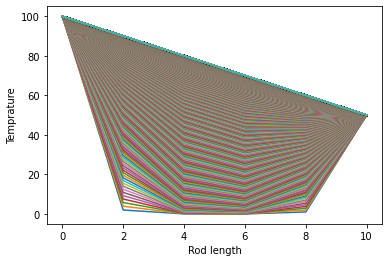

In [ ]:
#IMPLICIT METHOD
from numpy import array        # Importing Libraries
import numpy as np             #libraries and functions importing
import time
import matplotlib.pyplot as plt
T = [100,0,0,0,0,50]
arr = []
i=0
dt=0.1
t_end=2000
t=0.1
lam =  0.020875
while (i<=len(T)-3):
  arr.append(i)
  i=i+1
#print(arr)
f_0 = lambda t: 100
f_end = lambda t: 50
#print(f_0(29))

A_1=[]
A = np.zeros((len(T)-2, len(T)-2))
for j in arr:
    if (j==0):
      A[0][0]=1+(2*lam)
      A[0][1]= (-1)*lam
    elif (j==max(arr)):
      A[max(arr)][max(arr)-1]=(-1)*lam
      A[max(arr)][max(arr)]= 1+(2*lam)
    else:
      A[j][j-1]=(-1)*lam
      A[j][j]=1+(2*lam)
      A[j][j+1]=(-1)*lam

while (t<=t_end):
  j=2
  b_1=np.zeros(len(T))
  p=[]
  p.append(T[1]+lam*f_0(t))
  while (j<=len(arr)-1):
    p.append(T[j])
    j=j+1
  p.append(T[-2]+lam*f_end(t))
  p=np.array(p)
  p=np.transpose(p)
  #print(A)
  #print(p)
  b_2=np.matmul(np.linalg.inv(A),p)
  b_1[0]=f_0(t)
  w=1

  while (w<=len(b_1)-2):
    b_1[w]=b_2[w-1]
    w=w+1
  b_1[len(b_1)-1]=f_end(t)
  A_1.append(b_1)
  T= b_1.tolist()
  #print(T)
  t=t+dt
A_1=np.array(A_1)
print(A_1)
#print(p)
#print(A)
i=0
x=np.array([0,2,4,6,8,10])
while (i<=len(A_1)-1):
  plt.plot(x,A_1[i])
  i=i+1
plt.xlabel("Rod length")
plt.ylabel("Temprature")

IMPLICIT METHOD (using gauss-siedel method)

[[1.00000000e+02 2.00465303e+00 4.05888074e-02 2.08985938e-02
  1.00233862e+00 5.00000000e+01]
 [1.00000000e+02 3.93053648e+00 1.18962699e-01 6.18268666e-02
  1.96532686e+00 5.00000000e+01]
 [1.00000000e+02 5.78151161e+00 2.32490709e-01 1.21937311e-01
  2.89092614e+00 5.00000000e+01]
 ...
 [1.00000000e+02 7.85988168e+01 6.16020744e+01 5.16617403e+01
  4.86953664e+01 5.00000000e+01]
 [1.00000000e+02 7.86900028e+01 6.17481952e+01 5.18061883e+01
  4.87838451e+01 5.00000000e+01]
 [1.00000000e+02 7.87804388e+01 6.18931442e+01 5.19495113e+01
  4.88716498e+01 5.00000000e+01]]


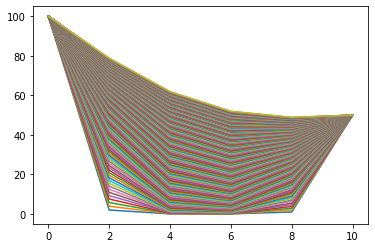

In [ ]:
#IMPLICIT METHOD
from numpy import array        # Importing Libraries
import numpy as np             #libraries and functions importing
import time
import matplotlib.pyplot as plt
def gauss_seidel(a, x ,b): #we are using gauss - siedel method for the approximations of the answer
    #Finding length
    n = len(a)
    # for loop for 3 times as to calculate x, y , z
    for j in range(0, n):
        # temp variable d to store b[j]
        d = b[j]

        # to calculate respective xi, yi, zi
        for i in range(0, n):
            if(j != i):
                d-=a[j][i] * x[i]
        # updating the value of our solution
        x[j] = d / a[j][j]
    # returning our updated solution
    return x
T = [100,0,0,0,0,50]
arr = []
i=0
dt=0.1
t_end=20
t=0.1
lam =  0.020875
while (i<=len(T)-3):
  arr.append(i)
  i=i+1
#print(arr)
f_0 = lambda t: 100
f_end = lambda t: 50
#print(f_0(29))

A_1=[]
A = np.zeros((len(T)-2, len(T)-2))
for j in arr:
    if (j==0):
      A[0][0]=1+(2*lam)
      A[0][1]= (-1)*lam
    elif (j==max(arr)):
      A[max(arr)][max(arr)-1]=(-1)*lam
      A[max(arr)][max(arr)]= 1+(2*lam)
    else:
      A[j][j-1]=(-1)*lam
      A[j][j]=1+(2*lam)
      A[j][j+1]=(-1)*lam

while (t<=t_end):
  b_2=np.zeros(len(T)-2)
  j=2
  b_1=np.zeros(len(T))
  p=[]
  p.append(T[1]+lam*f_0(t))
  while (j<=len(arr)-1):
    p.append(T[j])
    j=j+1
  p.append(T[-2]+lam*f_end(t))
  p=np.array(p)
  p=np.transpose(p)
  #print(A)
  #print(p)
  for i in range(0, 25):
    b_2 = gauss_seidel(A, b_2, p)
  b_1[0]=f_0(t)
  w=1

  while (w<=len(b_1)-2):
    b_1[w]=b_2[w-1]
    w=w+1
  b_1[len(b_1)-1]=f_end(t)
  A_1.append(b_1)
  T= b_1.tolist()

  #print(T)
  t=t+dt
A_1=np.array(A_1)
print(A_1)
#print(p)
#print(A)
i=0
x=np.array([0,2,4,6,8,10])
while (i<=len(A_1)-1):
  plt.plot(x,A_1[i])
  i=i+1

DYNAMIC MODE DECOMPOSITION APPLICATION:
1D LINEAR ADVECTION EQUATION

<ipython-input-5-721911b7a510>:43: RuntimeWarning: overflow encountered in double_scalars
  u_new[i] = ((1+C)*u_old[i]) - (C*u_old[i+1])
<ipython-input-5-721911b7a510>:53: RuntimeWarning: invalid value encountered in double_scalars
  sub_list.append(i1-i2)


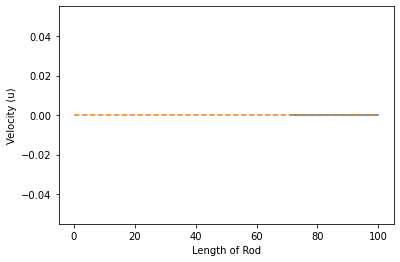

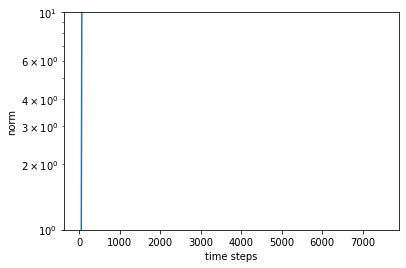

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.25
Co = 2000
density = 1300
alpha = k / (Co*density)
dx = 0.001 #taking everything in the SI units system
X = np.array(np.arange(0,0.01+dx,dx))
dt = float(input("ENTER THE TIME STEP: "))
t = 0
#print(X)
C = alpha*dt/(dx)**2

T_old = np.zeros(len(X))
T_new = np.zeros(len(X))

def applybc(T):
  T[0] = 250
  T[-1]= 250
  return T

T_old[:] = 30

while (T_new[5] <= 140.00):
  t = t + dt
  for i in range(1,(len(T_old)-1)):
    T_new[i] = C*T_old[i-1] + (1-2*C)*T_old[i] + C*T_old[i+1]
  T_new = applybc(T_new)
  if (T_new[5] > 140.00):
    break
  #print(T_new)
  for i in range(0,len(T_new)):
    T_old[i] = T_new[i]
plt.plot(X,T_new)
plt.xlabel("x-coordinates")
plt.ylabel("Temperature")
plt.title("Temperature Distribution")
print("TIME REQUIRED IS: ",t)



Streaming output truncated to the last 5000 lines.
32703 7.483602918313921e-06
32704 7.480589990305464e-06
32705 7.477578275312714e-06
32706 7.4745677728505345e-06
32707 7.471558482433791e-06
32708 7.468550403561783e-06
32709 7.465543535757159e-06
32710 7.462537878529596e-06
32711 7.459533431386176e-06
32712 7.456530193849548e-06
32713 7.453528165431981e-06
32714 7.450527345635371e-06
32715 7.4475277339849595e-06
32716 7.444529329990423e-06
32717 7.44153213316144e-06
32718 7.438536143020655e-06
32719 7.435541359075155e-06
32720 7.4325477808398015e-06
32721 7.429555407832056e-06
32722 7.42656423956419e-06
32723 7.423574275553662e-06
32724 7.4205855153153375e-06
32725 7.417597958361487e-06
32726 7.41461160421476e-06
32727 7.411626452382238e-06
32728 7.4086425023813816e-06
32729 7.405659753734838e-06
32730 7.402678205952284e-06
32731 7.399697858553774e-06
32732 7.396718711054173e-06
32733 7.393740762968347e-06
32734 7.390764013818943e-06
32735 7.3877884631208275e-06
32736 7.38481411038886

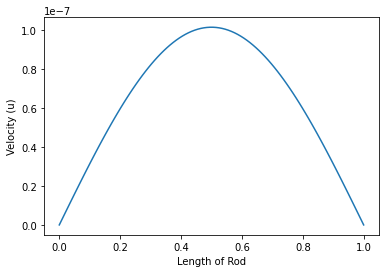

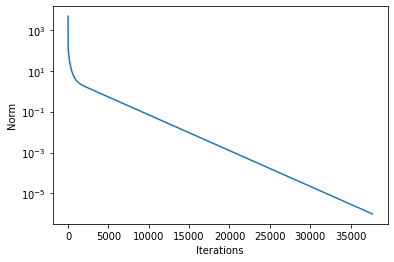

In [ ]:
#IMPLICIT METHOD 1D DIFFUSION EQUATION
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import time

#lets take the input of the number of points you want your mesh to get divided into
mesh_points = int(input("Enter the number of the mesh points: "))

#here our given domain is [0,1] hence lets start making the grids
x_cor = np.array(np.linspace(0,1,mesh_points))

#lets start initializing the required variables for the given problem

alpha = 1
dx = 1 / (mesh_points-1)
lamda = 0.4
dt = (lamda*(dx**2))/alpha
t=dt

u_old = np.zeros(mesh_points) #creating an zero array for storing the data as the nth time step
u_new = np.zeros(mesh_points) #creating an zero array for storing the data as the n+1th time step
steady_term = np.zeros(mesh_points) #here we are creating the array for storing the analytical solution of the differential equation which is given by the equation f(x-ct) where f(x) is the initial condition

#we will start storing the inital conditions in the array
for i in range(0,mesh_points):
  if (abs(x_cor[i]-0.5)>0.1):
    u_old[i]=0
  else:
    u_old[i]=1

s = alpha * dt/(dx**2.0)
# Diagonal elements of system matrix
d  = np.zeros(mesh_points)        # main diagonal elements
u  = np.zeros(mesh_points)        # upper diagonal
l  = np.zeros(mesh_points)        # lower diagonal

# Construct the elements of the coefficient matrix
l[0]  = 0.0
u[0]  = 0.0
d[0]  = 1.0
l[-1] = 0.0
u[-1] = 0.0
d[-1] = 1.0
for i in range(1,mesh_points-1):
  d[i] =  1.0+2.0*s
  l[i] = -s
  u[i] = -s

def tdma(num, dia, upp, low, uPrev, u):

  P    = np.zeros(num)
  Q    = np.zeros(num)

  # Forward elimination
  P[0] = -upp[0]/dia[0]
  Q[0] =  uPrev[0]/dia[0]
  for i in range(1, mesh_points):
    P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
    Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

  # Backward Substitution
  u[-1] = Q[-1]
  for i in range(mesh_points-2,-1,-1):
    u[i] = P[i]*u[i+1]+Q[i]
  return u

# Solve the discretized equation until steady state is achieved
norm        = 100.0       # Measure of residual or error
iter        = 0           # Iteration counter
converged   = False       # Convergence flag - changes to "True" upon convergence
norm_cllt = []

while (norm>0.000001):
  #Lets start the calculation of the new time step
  u_new = tdma(mesh_points, d, u, l, u_old, u_new)
  u_new[0]=0
  u_new[-1]=0
  t=t+dt #incrementing the time of the solution
  sub_list = list([])
  for i1,i2 in zip(u_new,u_old):
    sub_list.append(abs(i1-i2))
  norm = max(sub_list)/dt
  norm_cllt.append(norm)

  # Increment iteration counter
  iter = iter + 1

  # Print norm to monitor convergence
  print(iter, norm)

  for i in range(0, mesh_points):
    u_old[i] = u_new[i]

norm_cllt = np.array(norm_cllt)
plt.plot(x_cor,u_new)
plt.xlabel("Length of Rod")
plt.ylabel("Velocity (u)")
plt.show()
iter = np.linspace(1,len(norm_cllt),len(norm_cllt))
plt.plot(iter,norm_cllt)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Norm")
plt.show()



In [ ]:
#IMPLICIT METHOD 1D DIFFUSION EQUATION
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import time

#lets take the input of the number of points you want your mesh to get divided into
mesh_points = int(input("Enter the number of the mesh points: "))

#here our given domain is [0,1] hence lets start making the grids
x_cor = np.array(np.linspace(0,1,mesh_points))

#lets start initializing the required variables for the given problem

alpha = 1
dx = 1 / (mesh_points-1)
lamda = 0.4
dt = (lamda*(dx**2))/alpha
t=dt

u_old = np.zeros(mesh_points) #creating an zero array for storing the data as the nth time step
u_new = np.zeros(mesh_points) #creating an zero array for storing the data as the n+1th time step
steady_term = np.zeros(mesh_points) #here we are creating the array for storing the analytical solution of the differential equation which is given by the equation f(x-ct) where f(x) is the initial condition

#we will start storing the inital conditions in the array
for i in range(0,mesh_points):
  if (abs(x_cor[i]-0.5)>0.1):
    u_old[i]=0
  else:
    u_old[i]=1

s = alpha * dt/(dx**2.0)
# Diagonal elements of system matrix
d  = np.zeros(mesh_points)        # main diagonal elements
u  = np.zeros(mesh_points)        # upper diagonal
l  = np.zeros(mesh_points)        # lower diagonal

# Construct the elements of the coefficient matrix
l[0]  = 0.0
u[0]  = 0.0
d[0]  = 1.0
l[-1] = 0.0
u[-1] = 0.0
d[-1] = 1.0
for i in range(1,mesh_points-1):
  d[i] =  1.0+2.0*s
  l[i] = -s
  u[i] = -s

def tdma(num, dia, upp, low, uPrev, u):

  P    = np.zeros(num)
  Q    = np.zeros(num)

  # Forward elimination
  P[0] = -upp[0]/dia[0]
  Q[0] =  uPrev[0]/dia[0]
  for i in range(1, mesh_points):
    P[i] = -(upp[i]/(dia[i]+low[i]*P[i-1]))
    Q[i] =  (uPrev[i] - low[i]*Q[i-1])/(dia[i]+low[i]*P[i-1])

  # Backward Substitution
  u[-1] = Q[-1]
  for i in range(mesh_points-2,-1,-1):
    u[i] = P[i]*u[i+1]+Q[i]
  return u

# Solve the discretized equation until steady state is achieved
norm        = 100.0       # Measure of residual or error
iter        = 0           # Iteration counter
converged   = False       # Convergence flag - changes to "True" upon convergence
norm_cllt = []

while (norm>0.000001):
  #Lets start the calculation of the new time step
  u_new = tdma(mesh_points, d, u, l, u_old, u_new)
  u_new[0]=0
  u_new[-1]=0
  t=t+dt #incrementing the time of the solution
  sub_list = list([])
  for i1,i2 in zip(u_new,u_old):
    sub_list.append(abs(i1-i2))
  norm = max(sub_list)/dt
  norm_cllt.append(norm)

  # Increment iteration counter
  iter = iter + 1

  # Print norm to monitor convergence
  print(iter, norm)

  for i in range(0, mesh_points):
    u_old[i] = u_new[i]

norm_cllt = np.array(norm_cllt)
plt.plot(x_cor,u_new)
plt.xlabel("Length of Rod")
plt.ylabel("Velocity (u)")
plt.show()
iter = np.linspace(1,len(norm_cllt),len(norm_cllt))
plt.plot(iter,norm_cllt)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Norm")
plt.show()